In [2]:
from pymongo import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
plt.rcParams['font.sans-serif']=['SimHei'] 

In [3]:
client = MongoClient('localhost',27018)  
db = client['data']   

['蠟筆', '筆', '筆芯', '鉛筆', '原子筆', '彩色筆', '麥克筆']
[11, 27, 2, 6, 16, 4, 11]


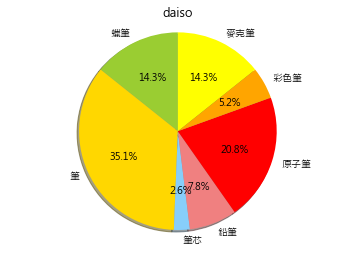

['修正帶', '橡皮擦']
[9, 8]


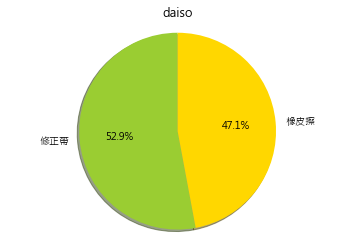

['貼紙', '凝膠', '膠台', '膠帶', '便利貼', '便條貼', '口紅膠', '膠帶台', '布膠帶', '紙膠帶', '便條紙', '便條', '膠水']
[25, 18, 1, 23, 14, 3, 1, 2, 3, 24, 16, 1, 2]


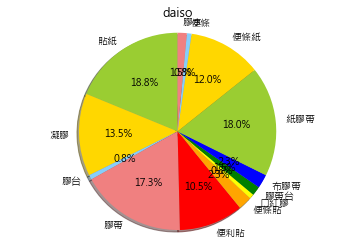

['筆記本', '繪本', '剪貼簿']
[126, 6, 4]


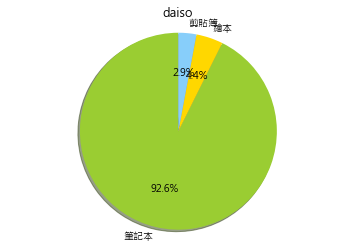

['信紙', '感謝卡', '紙', '牛皮紙', '卡片']
[34, 2, 13, 3, 18]


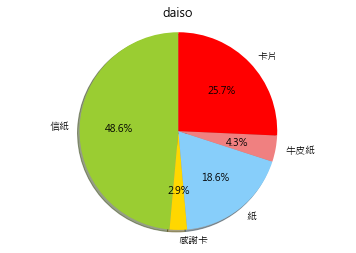

['長尾夾', '文件夾', '名片夾', '板夾', '卡夾', '資料夾']
[3, 5, 5, 9, 1, 11]


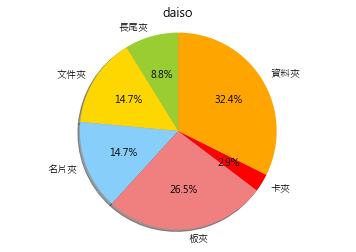

['剪刀', '切割器', '美工刀', '釘書機', '刀片', '圖釘', '削鉛筆機', '捲尺', '印章', '迴紋針', '別針']
[42, 8, 11, 11, 2, 4, 1, 6, 6, 3, 3]


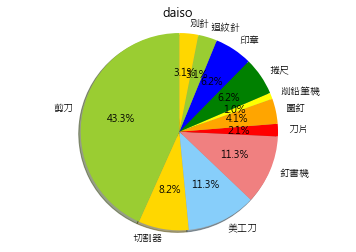

['紙盒', '筆筒', '筆袋', '收納組', '筆盒', '收納架', '掛架']
[7, 30, 9, 1, 1, 11, 8]


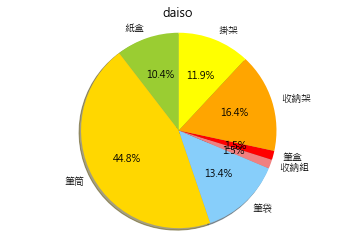

['環保袋', '提袋', '防水袋', '束口袋', '收納袋', '紙袋', '信封', '文件袋', '置物袋', '保護套']
[4, 58, 3, 75, 88, 54, 41, 6, 4, 2]


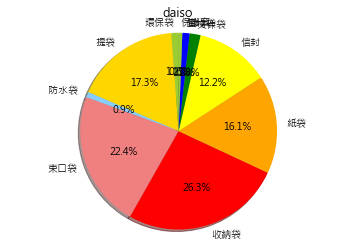

['束帶', '吊飾', '桌墊', '展示架', '吊牌', '黑板', '相框', '緞帶', '白板', '保護膜', '墊板', '軟墊', '識別證', '調色盤', '標示牌', '吊環', '包裝紙']
[17, 14, 7, 15, 2, 10, 29, 30, 20, 1, 1, 3, 1, 2, 1, 3, 1]


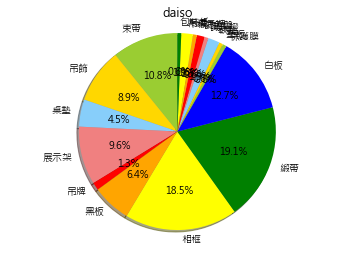

In [16]:
shops = ["daiso"]
with open(r'C:\Users\BIG DATA\Desktop\tag5.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
    rows = csv.reader(f, delimiter=',') 
    for row in rows:    #讀入每一row
        tags = []       #將所有tag存入此
        for i in range(1,len(row)):   
            tags.append(row[i]) 
            
        for shop in shops:
            count = []
            tagre = []
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                if a != 0:
                    count.append(a)
                else:
                    tagre.append(tag)
            for tag in tagre:
                tags.remove(tag)
                
#=====================================draw time!============================================
            print(tags)
            print(count)
            plt.pie(count,labels=tags,colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','orange','yellow','green','blue'] ,
                    autopct='%1.1f%%', shadow=True, startangle=90)
            plt.title(shop) 
            plt.axis('equal')    
            plt.show()
            print("=====================================================")

In [ ]:
,"epice","gohappy","mft","poya","supergood","pos"

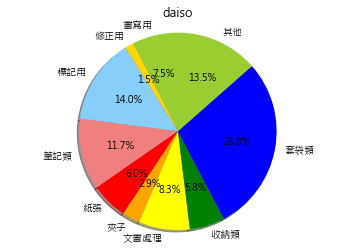

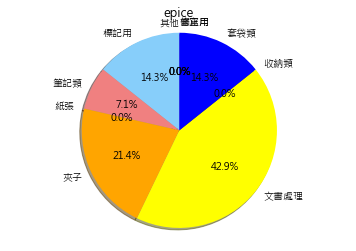

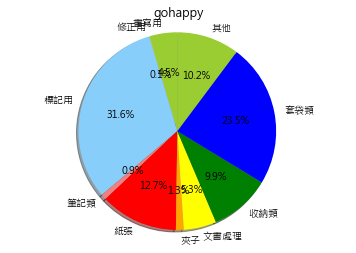

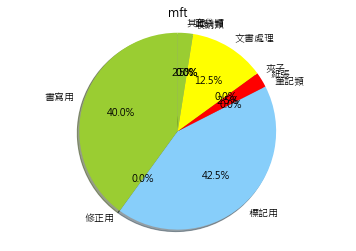

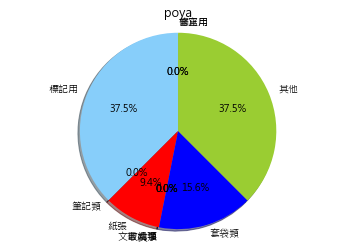

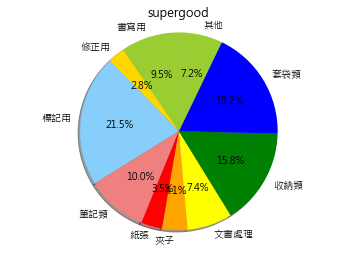

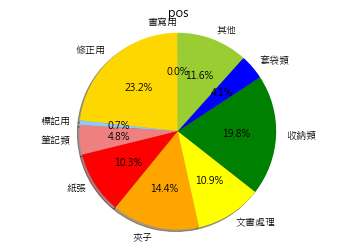

In [15]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["書寫用","修正用","標記用","筆記類","紙張","夾子","文書處理","收納類","套袋類","其他"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag5.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
                
#=====================================draw time!============================================
    
    plt.pie(categoryCount,labels=category,colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','orange','yellow','green','blue'] ,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(shop) 
    plt.axis('equal')    
    plt.show()
    print("=====================================================")

# 找出各類筆數(文具類)

In [3]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["書寫用","修正用","標記用","筆記類","紙張","夾子","文書處理","收納類","套袋類","其他"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag5.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
        zipped = zip(category,categoryCount)
        
        new = open(shop+'文具.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
        writer = csv.writer(new)
        
        for i in zipped:
            writerIn = []
            writerIn.append(i[0])
            writerIn.append(i[1])
            print(writerIn)
            writer.writerow(writerIn)
        print("=====================================")

['書寫用', 77]
['修正用', 17]
['標記用', 133]
['筆記類', 136]
['紙張', 70]
['夾子', 34]
['文書處理', 97]
['收納類', 67]
['套袋類', 335]
['其他', 157]
['書寫用', 0]
['修正用', 0]
['標記用', 1]
['筆記類', 1]
['紙張', 0]
['夾子', 3]
['文書處理', 6]
['收納類', 0]
['套袋類', 2]
['其他', 0]
['書寫用', 58]
['修正用', 1]
['標記用', 298]
['筆記類', 12]
['紙張', 169]
['夾子', 17]
['文書處理', 71]
['收納類', 132]
['套袋類', 312]
['其他', 136]
['書寫用', 8]
['修正用', 0]
['標記用', 16]
['筆記類', 0]
['紙張', 1]
['夾子', 0]
['文書處理', 5]
['收納類', 0]
['套袋類', 0]
['其他', 1]
['書寫用', 0]
['修正用', 0]
['標記用', 12]
['筆記類', 0]
['紙張', 3]
['夾子', 0]
['文書處理', 0]
['收納類', 0]
['套袋類', 5]
['其他', 12]
['書寫用', 44]
['修正用', 13]
['標記用', 92]
['筆記類', 32]
['紙張', 16]
['夾子', 19]
['文書處理', 34]
['收納類', 73]
['套袋類', 84]
['其他', 33]
['書寫用', 1290348]
['修正用', 5978825]
['標記用', 1504992]
['筆記類', 873579]
['紙張', 2141401]
['夾子', 3206432]
['文書處理', 2137541]
['收納類', 4915019]
['套袋類', 7203]
['其他', 2354259]


# 找出各類筆數(食品類)

In [4]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["餅乾","零食","飲料","泡麵","其他"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag2.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
        zipped = zip(category,categoryCount)
        
        new = open(shop+'食品.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
        writer = csv.writer(new)
        
        for i in zipped:
            writerIn = []
            writerIn.append(i[0])
            writerIn.append(i[1])
            print(writerIn)
            writer.writerow(writerIn)
        print("=====================================")

['餅乾', 21]
['零食', 21]
['飲料', 33]
['泡麵', 2]
['其他', 47]
['餅乾', 1]
['零食', 1]
['飲料', 1]
['泡麵', 1]
['其他', 4]
['餅乾', 9]
['零食', 183]
['飲料', 201]
['泡麵', 5]
['其他', 95]
['餅乾', 11]
['零食', 47]
['飲料', 42]
['泡麵', 4]
['其他', 20]
['餅乾', 6]
['零食', 11]
['飲料', 46]
['泡麵', 1]
['其他', 7]
['餅乾', 6]
['零食', 20]
['飲料', 12]
['泡麵', 0]
['其他', 12]
['餅乾', 1069272]
['零食', 4943]
['飲料', 3632389]
['泡麵', 8112928]
['其他', 856773]


# 找出各類筆數(棉織類)

In [5]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["頭部用","褲類","上半身衣物類","腳用","擦拭用"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag7.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
        zipped = zip(category,categoryCount)
        
        new = open(shop+'棉織.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
        writer = csv.writer(new)
        
        for i in zipped:
            writerIn = []
            writerIn.append(i[0])
            writerIn.append(i[1])
            print(writerIn)
            writer.writerow(writerIn)
        print("=====================================")

['頭部用', 27]
['褲類', 5]
['上半身衣物類', 69]
['腳用', 220]
['擦拭用', 6]
['頭部用', 3]
['褲類', 0]
['上半身衣物類', 2]
['腳用', 0]
['擦拭用', 2]
['頭部用', 308]
['褲類', 73]
['上半身衣物類', 391]
['腳用', 569]
['擦拭用', 378]
['頭部用', 1]
['褲類', 11]
['上半身衣物類', 1]
['腳用', 15]
['擦拭用', 2]
['頭部用', 5]
['褲類', 0]
['上半身衣物類', 5]
['腳用', 26]
['擦拭用', 0]
['頭部用', 9]
['褲類', 3]
['上半身衣物類', 49]
['腳用', 15]
['擦拭用', 38]
['頭部用', 1921883]
['褲類', 2349018]
['上半身衣物類', 2234]
['腳用', 217085]
['擦拭用', 428475]


# 找出各類筆數(食品類)

In [ ]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["書寫用","修正用","標記用","筆記類","紙張","夾子","文書處理","收納類","套袋類","其他"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag5.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
        zipped = zip(category,categoryCount)
        
        new = open(shop+'.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
        writer = csv.writer(new)
        
        for i in zipped:
            writerIn = []
            writerIn.append(i[0])
            writerIn.append(i[1])
            print(writerIn)
            writer.writerow(writerIn)
        print("=====================================")

# 找出各類筆數(食品類)

In [ ]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["書寫用","修正用","標記用","筆記類","紙張","夾子","文書處理","收納類","套袋類","其他"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag5.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
        zipped = zip(category,categoryCount)
        
        new = open(shop+'.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
        writer = csv.writer(new)
        
        for i in zipped:
            writerIn = []
            writerIn.append(i[0])
            writerIn.append(i[1])
            print(writerIn)
            writer.writerow(writerIn)
        print("=====================================")

# 找出各類筆數(食品類)

In [ ]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]
category = ["書寫用","修正用","標記用","筆記類","紙張","夾子","文書處理","收納類","套袋類","其他"]

for shop in shops:
    with open(r'C:\Users\BIG DATA\Desktop\tag5.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',')
        categoryCount = []
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            sum = 0
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                sum += a
                
            categoryCount.append(sum)
        zipped = zip(category,categoryCount)
        
        new = open(shop+'.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
        writer = csv.writer(new)
        
        for i in zipped:
            writerIn = []
            writerIn.append(i[0])
            writerIn.append(i[1])
            print(writerIn)
            writer.writerow(writerIn)
        print("=====================================")

# 各家小項統計(食品類)

In [4]:
shops = ["daiso","epice","gohappy","mft","poya","supergood","pos"]

for shop in shops:
    
    with open(r'C:\Users\BIG DATA\Desktop\tag2.csv',encoding = "big5") as f:   #(r'......) 這裡的r是告訴python說後面的字串為raw string(忽略 \ 效果)
        rows = csv.reader(f, delimiter=',') 
        
        ccount = 1
        
        for row in rows:    #讀入每一row
            tags = []       #將所有tag存入此
            for i in range(1,len(row)):   
                tags.append(row[i]) 
            
            count = []
            tagre = [] 
            
            for tag in tags:
                collection=db[shop]
                a = collection.find({"Tags":tag}).count()
                if a != 0:
                    count.append(a)
                else:
                    tagre.append(tag)
            for tag in tagre:
                tags.remove(tag)
                
            zipped = zip(tags,count)
            
            
            
            new = open(shop+str(ccount)+'.csv','w',encoding = "utf-8" ,newline='')   #將斷好的字詞存入一個新檔案
            writer = csv.writer(new)
            
            print(ccount)
            print(shop)
            for i in zipped:
                writerIn = []
                writerIn.append(i[0])
                writerIn.append(i[1])
                print(writerIn)
                writer.writerow(writerIn)
            ccount += 1
                
                #writer.writerow(writerIn)
            print("=====================================")

1
daiso
['餅乾', 21]
2
daiso
['甜甜圈', 2]
['軟糖', 4]
['糖果', 1]
['馬卡龍', 2]
['巧克力棒', 3]
['水果糖', 1]
['口香糖', 1]
['糖', 3]
['巧克力', 4]
3
daiso
['茶', 1]
['綠茶', 10]
['牛奶', 1]
['水', 6]
['啤酒', 1]
['咖啡', 11]
['牛乳', 2]
['果汁', 1]
4
daiso
['麵', 2]
5
daiso
['果醬', 1]
['花生', 1]
['吐司', 4]
['麵包', 1]
['海苔', 9]
['茶包', 1]
['黑胡椒', 1]
['奶油球', 1]
['奶油', 6]
['豆腐', 4]
['蛋糕', 18]
1
epice
['薯條', 1]
2
epice
['果凍', 1]
3
epice
['咖啡', 1]
4
epice
['麵', 1]
5
epice
['麵包', 2]
['奶油', 1]
['蛋糕', 1]
1
gohappy
['餅乾', 5]
['煎餅', 4]
2
gohappy
['甜甜圈', 14]
['糖果', 37]
['馬卡龍', 78]
['果凍', 42]
['巧克力', 10]
['棉花糖', 2]
3
gohappy
['茶', 3]
['水果茶', 1]
['綠茶', 16]
['牛奶', 11]
['拿鐵', 42]
['水', 65]
['咖啡', 62]
['果汁', 1]
4
gohappy
['杯麵', 1]
['泡麵', 3]
['麵', 1]
5
gohappy
['花生', 5]
['吐司', 2]
['麵包', 12]
['蛋捲', 20]
['鬆餅', 4]
['維他命', 3]
['優格', 1]
['茶包', 1]
['碗麵', 1]
['奶油', 14]
['蜜糖', 3]
['蛋糕', 27]
['冰棒', 2]
1
mft
['洋芋片', 2]
['餅乾', 5]
['薯片', 1]
['蝴蝶餅', 2]
['威化餅', 1]
2
mft
['軟糖', 9]
['馬卡龍', 3]
['新貴派', 2]
['巧克力棒', 1]
['水果糖', 1]
['糖', 3]
['果凍', 6]
['巧克力', 18]
['棉花